SPT Tutorial

Using MLP for classification to predict the type of iris based on inputs for sepal legth, sepal width, petal length and petal width

A Note on Preprocessing:
the neural network may have difficulty converging before the maximum number of iterations allowerd if the data is not normalized. Multilayer perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for Standardization.

Irises Classes are:  ['setosa' 'versicolor' 'virginica']
The predicted value of y is that the iris type of:  [0]


The predicted value of y is that the iris of type:  [2]


Confusiion Matrix is: 
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





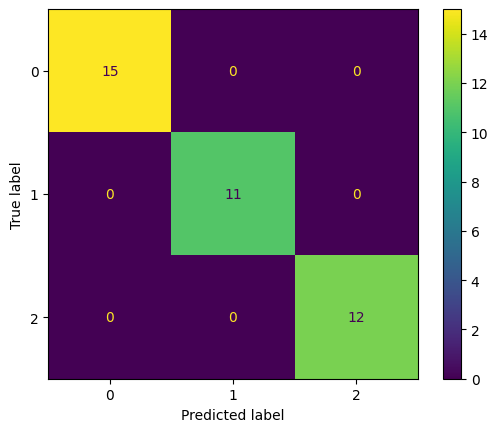

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

irises = datasets.load_iris()
X = irises.data
Y = irises.target
class_names = irises.target_names
print('Irises Classes are: ', class_names)

# train, test and split the dataset. Random number generator with popular integer -> 0 to 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)


#preprocessing - transformation
scaler = StandardScaler()

# fit only to the training data
scaler.fit(X_train)

# apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# create an MLP Model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9), max_iter=2000)

# fit the model
classifier = mlp.fit(X_train,Y_train)

# prediction
y_pred = mlp.predict(X_test)

# define a set of predictor inputs and use the model to make a prediction of the y output, the order of the values
# are aligned to the order of the columns
new_input = [[5,3.2,1.2,0.4]]
new_y = mlp.predict(new_input)

print('The predicted value of y is that the iris type of: ', new_y)
print("\n")

new_input2 = [[7.8, 2.5,6.5, 1.9]]
new_y2 = mlp.predict(new_input2)
print('The predicted value of y is that the iris of type: ', new_y2)
print("\n")

# model evaluation
print('Confusiion Matrix is: ')
print(confusion_matrix(Y_test, y_pred))
print('\n')
print(classification_report(Y_test, y_pred))
print('\n')

# plot non-normalized confusion matrix
cm = confusion_matrix(Y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()

Using SVM

Confusion Matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion Matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


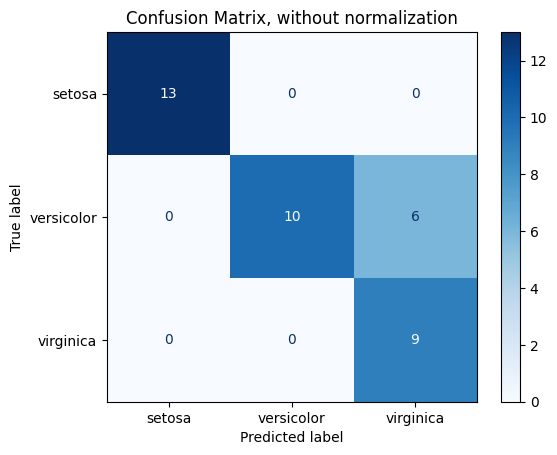

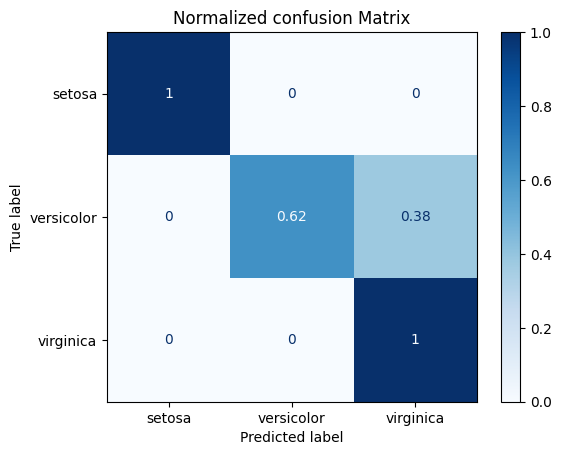

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names


# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

# run the classifier, using a model that is to regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# plot non-normalized confusion matrix
titles_options = [
    ("Confusion Matrix, without normalization", None),
    ("Normalized confusion Matrix","true"),
]

for title, normalize in titles_options:
  disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=class_names,cmap=plt.cm.Blues,
                                               normalize=normalize)
  disp.ax_.set_title(title)
  print(title)
  print(disp.confusion_matrix)

plt.show()

Wine Exercise:

Wine Column is target variable (1,2, or 3)
While the rest of the columns are predictors

Wine (Type 1,2,3) | Alcohol | Malic Acid | Ash | Alcalinity of ash | Magnesium | Total Phenols | Flavanoids | Nonflavanoid phenols | Proanthocynanins | Color Intensity | Hue | OD280/OD315 of diluted wines | Proline

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


Information about the number of records and columns:  (178, 14)


                      count        mean         std     min       25%  \
Wine                  178.0    1.938

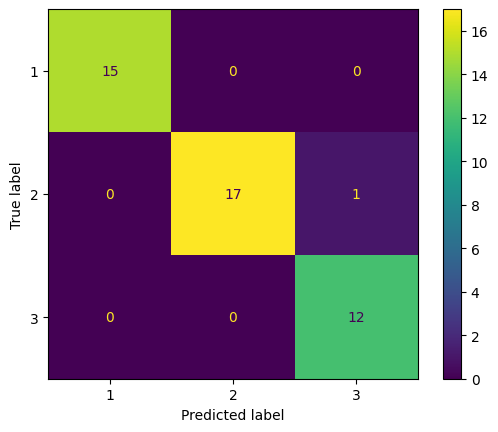

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# load and explore dataset
dataset = pd.read_csv('wine.txt',delimiter=",")
print(dataset.head())
print("\n")
print("Information about the number of records and columns: ", dataset.shape)
print("\n")
print(dataset.describe().transpose())
print("\n")

# select all except column 1 as predictors and wine type as target variable; axis = 1 refers to columns
X = dataset.drop('Wine', axis=1)
y = dataset['Wine']

# train, test, split the dataset. Random number generator, with popular integer see numbers are 0 to 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# pre-processing - transformation, etc
scaler = StandardScaler()


# fit only to the training data
scaler.fit(X_train)

# now apply the transofmration to the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# create an mlp model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9), max_iter=2000)

# fit the model
mlp.fit(X_train, y_train)

# prediction
y_pred = mlp.predict(X_test)

# define the set of predictor inputs and use the model to make a prediction of the y output. The order of values are aligned to the order of columns
new_input = [[12,2.2,2.3,19,80,1.5,2.0,0.2,1.2,1.2,2.5,1.4,390]]
new_y = mlp.predict(new_input)

print("The predicted value of y is that it is wine type: ", new_y)
print("\n")

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

print("============================================")
print(len(mlp.coefs_))
print(mlp.coefs_)
print("\n")

print("===========================================")
print(mlp.intercepts_)
print("\n")

# plot a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()

Vary the number of layers and perceptrons

Wine classess are:  ['class_0' 'class_1' 'class_2']
The predicted value of y is of wine type:  [0]


Confusion Matrix is 
[[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45





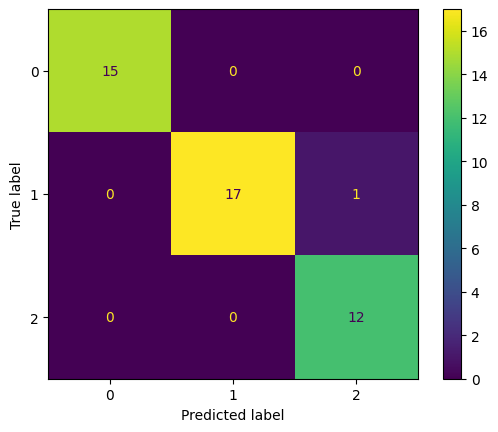

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# load and explore dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

class_names = wine.target_names
print("Wine classess are: ", class_names)

# train, test, and split the dataset. Random number generator, with popular integers see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# preprocessing - transformation, etc
scaler = StandardScaler()

# fit only to the training data
scaler.fit(X_train)

# now apply the transformation to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# create an mlp model with 4 hidden layers varying with different number of perceptrons in each layer, number of iterations is 2000
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9), max_iter=2000)

#fit the model
classifier = mlp.fit(X_train, y_train)

# prediction
y_pred = mlp.predict(X_test)

# define a set of predictor inputs and use the model to make a prediction of the y output. The order of values are aligned to the
# number of columns
new_input = [[12, 2.2, 2.3, 19, 80, 1.5, 2.0, 0.2, 1.2, 1.2, 2.5, 1.4, 390]]
new_y = mlp.predict(new_input)
print('The predicted value of y is of wine type: ', new_y)
print('\n')

# model evaluation
print('Confusion Matrix is ')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print('\n')

# plot a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()

Using the boston dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# load and explore dataset
dataset = pd.read_csv('boston.txt', delimiter=",")
print(dataset.head())
print("\n")
print('Information about the number of records and columns', dataset.shape)
print('\n')
print(dataset.isnull().sum())
print('\n')
print(dataset.describe())
print("\n")

# select columns except columns 3,6,10 and 11 as predictors and medv as target variable, axis 1  refers to columns
X = dataset.drop(['chas', 'age','ptratio','b'],axis=1)
y = dataset['medv']

print(X.head())
print("\n")
print(y.head())
print("\n")

# train, test, and split the dataset. Random number generator, with popular integers see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# preprocessing - transformation, etc
scaler = StandardScaler()

# fit only to the training data
scaler.fit(X_train)

# now apply the transformation to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# build and fit the neural network mlp regression model
nn = MLPRegressor(hidden_layer_sizes=(3), activation='relu', max_iter=500, solver='lbfgs')
nn_model = nn.fit(X_train, y_train)

# use the NN model to predict the target values
y_pred = nn_model.predict(X_test)

# define a set of predictor inputs and use the model to make a prediction of the y output. The order of values are aligned to the order of the columns
new_input = [[0.5, 12.0, 0.01, 0.55, 6.00, 3.5, 9.0, 10, 300, 13]]
new_y = nn_model.predict(new_input)
print('The predict y value is that the Median value x $1000', new_y)
print('\n')

# evaluation of the model
print("The mean squared error of the model is: ", mean_squared_error(y_test, y_pred))
print("The mean absolute error of the model is: ", mean_absolute_error(y_test, y_pred))
print("The R squared value of the model is ", r2_score(y_test, y_pred))
print("\n")

# cannot plot because there are 10 predictors

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Information about the number of records and columns (506, 14)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.00